# Smart Grid Energy Analysis to Reduce Waste
#### **Detecting and Preventing Energy Waste in the Smart Grid**

This project analyzes energy consumption data from a smart grid system. The overall goal of the project is to identify when and where the grid experiences energy inefficiencies, detect anomalies (such as power wastage), and predict and prevent such inefficiencies in real time.

**Key Business Questions**
- Where and when does the grid experience the most energy waste?
- Can we predict and prevent energy inefficiencies in real time?

**Dataset**

The dataset includes various energy-related metrics such as:

- Voltage (V)
- Current (A)
- Power Usage (kW)
- Frequency (Hz)
- Fault Indicator
- Fourier Transform (FFT) values

## 1. Load and Explore the Data

In [1]:
from scipy.stats import zscore
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('smart_grid_dataset.csv', parse_dates=['Timestamp'])

df.head()

,Timestamp,Voltage (V),Current (A),Power Usage (kW),Frequency (Hz),Fault Indicator,FFT_1,FFT_2,FFT_3,FFT_4,...,FFT_119,FFT_120,FFT_121,FFT_122,FFT_123,FFT_124,FFT_125,FFT_126,FFT_127,FFT_128
0,2024-01-01 00:00:00,216.184375,16.312557,3.526520,50.644332,2,0.946920,0.947293,0.948412,0.950283,...,0.238567,0.236457,0.234577,0.232924,0.231496,0.230291,0.229307,0.228543,0.227998,0.227672
1,2024-01-01 00:01:00,235.567787,14.363618,3.383606,49.595128,2,0.823621,0.823990,0.825097,0.826948,...,0.410883,0.409069,0.407456,0.406041,0.404820,0.403792,0.402954,0.402304,0.401840,0.401562
2,2024-01-01 00:02:00,229.058407,13.660371,3.129023,50.591698,1,0.653021,0.653399,0.654533,0.656430,...,0.545862,0.543983,0.542312,0.540847,0.539582,0.538517,0.537648,0.536974,0.536493,0.536206
3,2024-01-01 00:03:00,220.313612,14.768926,3.253795,50.584116,2,0.639772,0.640151,0.641291,0.643196,...,0.553846,0.551960,0.550283,0.548811,0.547542,0.546472,0.545600,0.544923,0.544441,0.544152
4,2024-01-01 00:04:00,233.550635,15.478231,3.614951,49.788418,0,0.259883,0.260519,0.262426,0.265594,...,0.694224,0.692172,0.690347,0.688744,0.687362,0.686196,0.685246,0.684508,0.683982,0.683667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 134 entries, Timestamp to FFT_128
dtypes: datetime64[ns](1), float64(132), int64(1)
memory usage: 1.0 MB


In [4]:
df.dtypes

Timestamp           datetime64[ns]
Voltage (V)                float64
Current (A)                float64
Power Usage (kW)           float64
Frequency (Hz)             float64
                         ...      
FFT_124                    float64
FFT_125                    float64
FFT_126                    float64
FFT_127                    float64
FFT_128                    float64
Length: 134, dtype: object

In [5]:
df.isnull().sum()

Timestamp           0
Voltage (V)         0
Current (A)         0
Power Usage (kW)    0
Frequency (Hz)      0
                   ..
FFT_124             0
FFT_125             0
FFT_126             0
FFT_127             0
FFT_128             0
Length: 134, dtype: int64

In [6]:
df.describe()

,Timestamp,Voltage (V),Current (A),Power Usage (kW),Frequency (Hz),Fault Indicator,FFT_1,FFT_2,FFT_3,FFT_4,...,FFT_119,FFT_120,FFT_121,FFT_122,FFT_123,FFT_124,FFT_125,FFT_126,FFT_127,FFT_128
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2024-01-01 08:19:29.999999744,230.098865,14.902411,3.427899,49.993699,0.971000,0.654456,0.655193,0.657077,0.659954,...,0.454007,0.451704,0.449624,0.447769,0.446137,0.444730,0.443553,0.442610,0.441910,0.441466
min,2024-01-01 00:00:00,199.660271,7.647198,1.861993,48.465754,0.000000,0.000369,0.017347,0.034733,0.052209,...,0.062772,0.056281,0.049861,0.043503,0.037200,0.030944,0.024729,0.018550,0.012412,0.006354
25%,2024-01-01 04:09:45,223.241045,13.525464,3.119343,49.650443,0.000000,0.417665,0.418119,0.419482,0.421759,...,0.276217,0.274244,0.272487,0.270944,0.269613,0.268490,0.267575,0.266864,0.266357,0.266054
50%,2024-01-01 08:19:30,229.730515,14.898624,3.426873,49.991669,1.000000,0.737074,0.737444,0.738557,0.740417,...,0.487922,0.486087,0.484455,0.483023,0.481788,0.480748,0.479899,0.479241,0.478772,0.478491
75%,2024-01-01 12:29:15,237.116511,16.228355,3.730984,50.349019,2.000000,0.926741,0.927112,0.928228,0.930094,...,0.653563,0.651565,0.649788,0.648228,0.646882,0.645748,0.644823,0.644105,0.643594,0.643287
max,2024-01-01 16:39:00,260.170264,22.351192,5.278567,51.682985,2.000000,0.999997,1.000373,1.001503,1.003392,...,0.718728,0.716641,0.714785,0.713155,0.711749,0.710564,0.709597,0.708847,0.708312,0.707992
std,NaN,10.093515,2.106757,0.500503,0.515551,0.806728,0.302126,0.301413,0.299978,0.298151,...,0.210186,0.210770,0.211347,0.211913,0.212459,0.212980,0.213464,0.213898,0.214264,0.214533


### Key Insights:

- Voltage and Power Usage show moderate variation around their means, suggesting normal fluctuations in grid behavior but within a stable range.

- Fault Indicator: The mean of 0.97 for Fault Indicator suggests that faults are relatively rare, but there are enough occurrences (since it's closer to 1) to warrant attention. The fact that it reaches a maximum value of 2 could imply different levels of faults.

- FFT values: The Fourier Transform values (FFT_1 to FFT_128) represent the magnitude of frequency components across a wide range of frequencies. These values help analyze the grid's frequency behavior, which is important for detecting anomalies or inefficiencies related to power quality and system performance.

- The consistency of FFT values across rows shows that the frequency components are not fluctuating wildly, but the spread (standard deviation) indicates that there is some variation in how the grid operates at different frequencies.

## 2. Exploratory Data Analysis

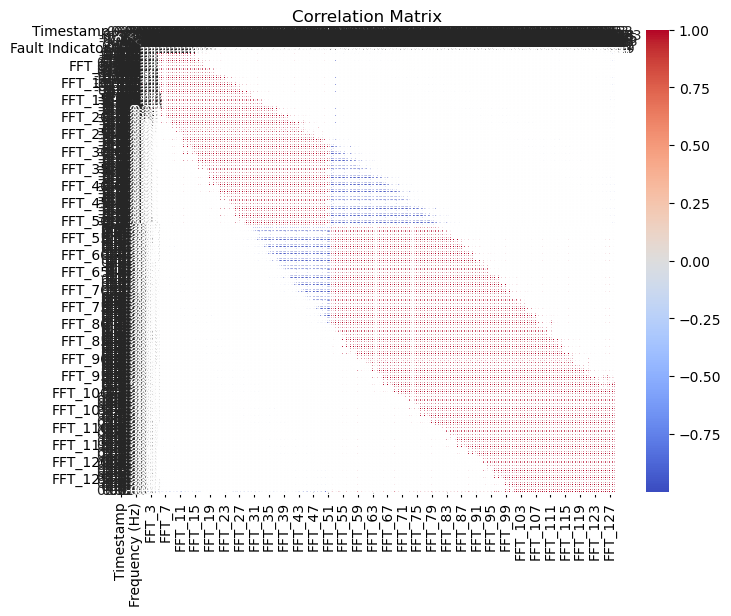

In [7]:
# Correlation Matrix

# The project starts by analyzing the correlations between various factors (e.g., voltage, current, power usage) to understand which variables influence power consumption the most. By visualizing correlations, it can help identify relationships between power usage and other features like voltage and current.

# Define a helper function to streamline repeated plotting
def plot_heatmap(data, title, annot=True, cmap='coolwarm'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=annot, cmap=cmap, linewidths=0.5)
    plt.title(title)
    plt.show()

# Correlation Matrix
corr_matrix = df.corr()
plot_heatmap(corr_matrix, 'Correlation Matrix')

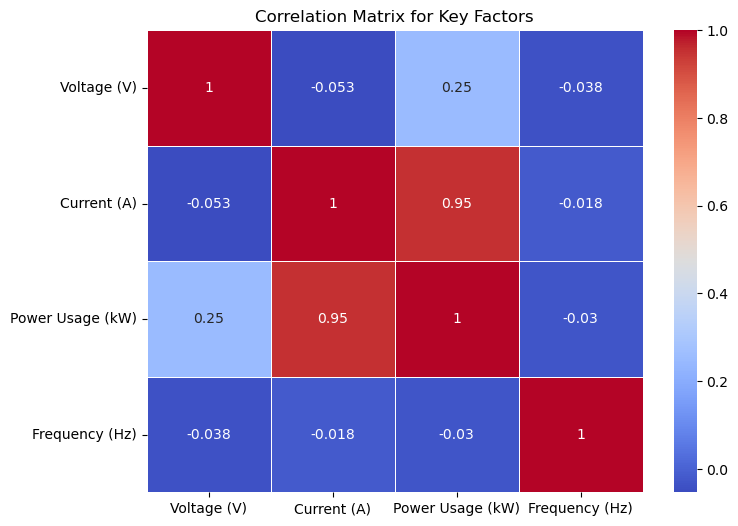

In [8]:
# Correlation Analysis
correlation_matrix = df[['Voltage (V)', 'Current (A)', 'Power Usage (kW)', 'Frequency (Hz)']].corr()
plot_heatmap(correlation_matrix, 'Correlation Matrix for Key Factors')

### Key Insights

- Current and Power Usage have a strong linear relationship, which makes sense because power usage is often directly related to current in electrical systems (Power = Voltage × Current). You might expect this correlation to be high.

Voltage, Frequency, and Current/Power Usage: The low correlations between voltage, frequency, and the other variables suggest that these features don't interact strongly with each other in this dataset. Frequency seems to be almost independent of the other variables.

Weak Correlations with Voltage and Frequency: Since voltage and frequency show weak correlations with other features, they might be less informative for predicting certain outcomes, depending on your analysis goal.

## 3. Anomaly Detection in Power Usage

Flag unexpected power surges causing energy waste. The code plots power usage over time, voltage and current trends, and fault occurrences. This helps to visualize when the grid experiences inefficiencies and to detect any patterns or trends that might indicate energy waste. Fault occurrences (e.g., overloads or short circuits) are analyzed to assess how frequently they contribute to inefficiencies. This helps identify which fault types need attention.

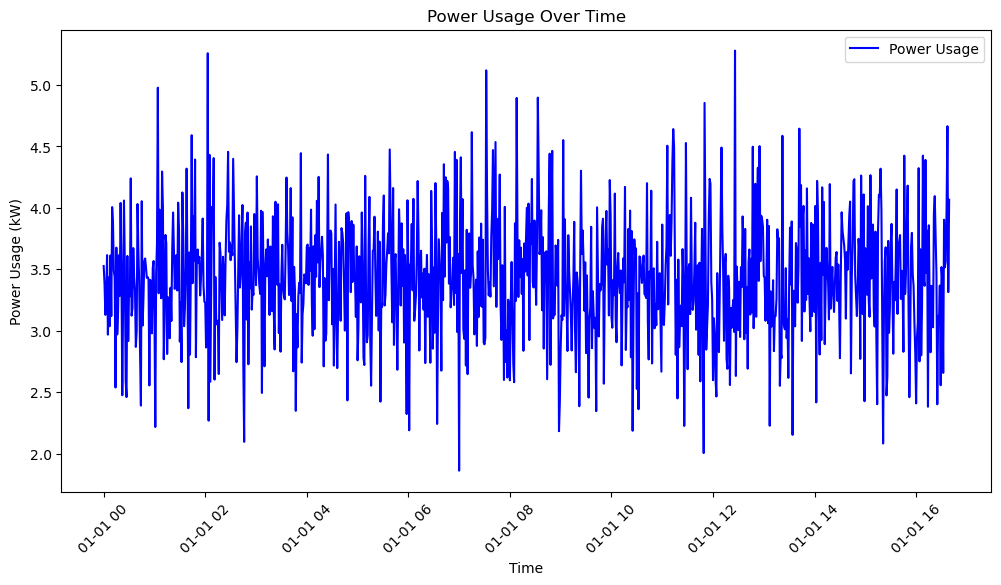

In [9]:
# Plot Power Usage over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Power Usage (kW)'], label='Power Usage', color='blue')
plt.xlabel('Time')
plt.ylabel('Power Usage (kW)')
plt.title('Power Usage Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show() 

### Identify Energy Waste Patterns

Energy waste can occur due to:

- Fluctuations in Voltage & Current
- Frequent Faults (Overload, Short Circuit)
- Unstable Frequency

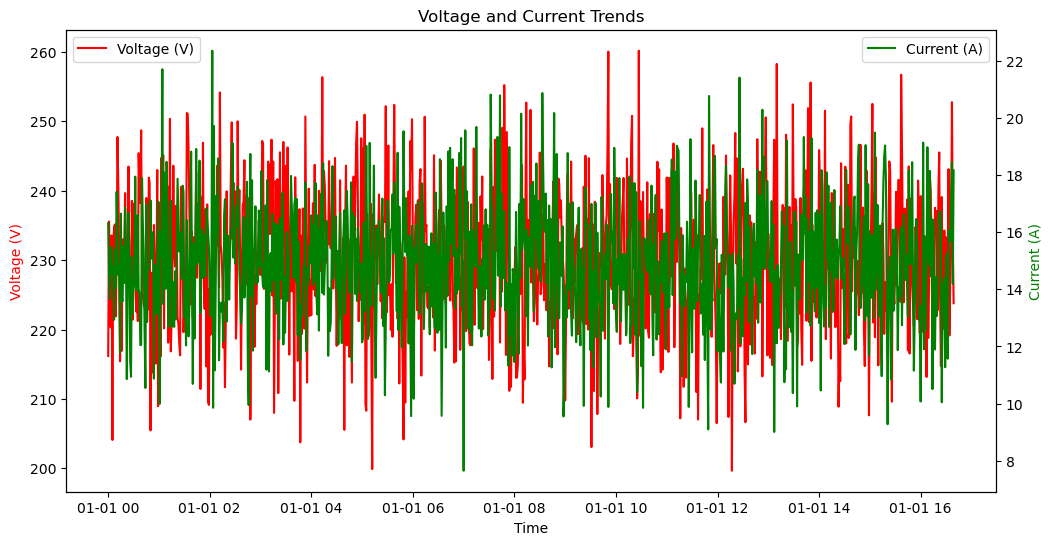

In [10]:
# Detect unstable power trends leading to energy waste.

# Voltage and Current Trends
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(df['Timestamp'], df['Voltage (V)'], label='Voltage (V)', color='red')
ax2.plot(df['Timestamp'], df['Current (A)'], label='Current (A)', color='green')
ax1.set_xlabel('Time')
ax1.set_ylabel('Voltage (V)', color='red')
ax2.set_ylabel('Current (A)', color='green')
ax1.set_title('Voltage and Current Trends')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

### Detect Overloads and Short Circuits

C:\Users\milto\AppData\Local\Temp\ipykernel_22628\2154946150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fault_counts.index, y=fault_counts.values, palette="viridis")


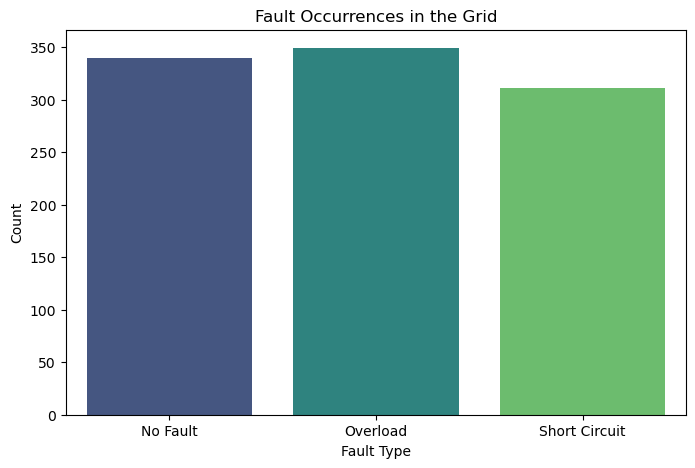

In [11]:
# Identify how frequently faults contribute to energy inefficiencies.

# Fault Occurrences
fault_counts = df['Fault Indicator'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=fault_counts.index, y=fault_counts.values, palette="viridis")
plt.xlabel('Fault Type')
plt.ylabel('Count')
plt.title('Fault Occurrences in the Grid')
plt.xticks(ticks=[0, 1, 2], labels=['No Fault', 'Overload', 'Short Circuit'])
plt.show()

**Where and when does the grid experience the most energy waste?**

The code detects anomalies in power usage using Z-score-based anomaly detection (Power_ZScore > 3). It plots power usage over time, which helps visualize high-consumption periods. The fault analysis (overload & short circuit detection) identifies system issues that may contribute to energy waste.

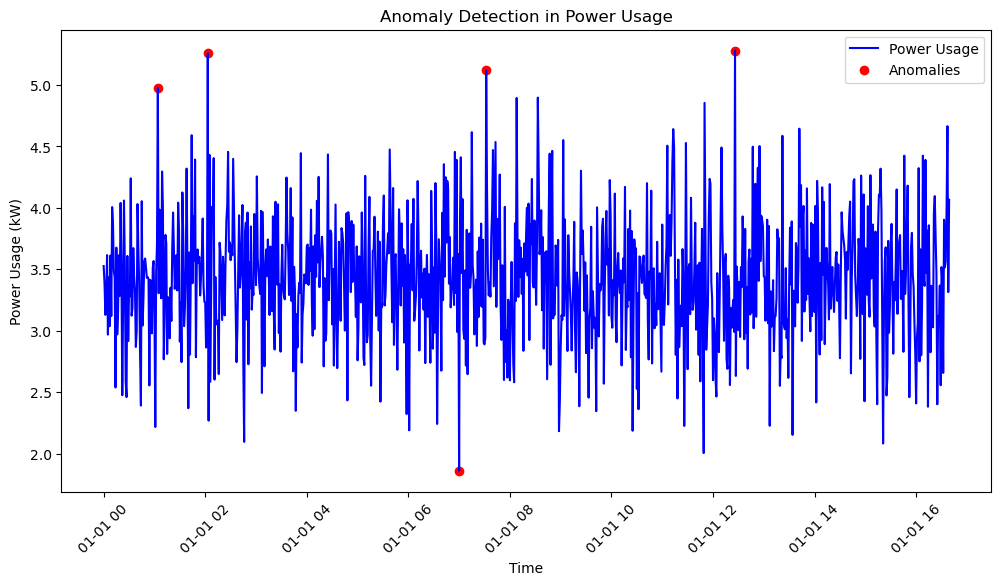

In [12]:
# Z-score Anomaly Detection
df['Power_ZScore'] = zscore(df['Power Usage (kW)'])
df['Anomaly'] = df['Power_ZScore'].abs() > 3
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Power Usage (kW)'], label='Power Usage', color='blue')
plt.scatter(df[df['Anomaly']]['Timestamp'], df[df['Anomaly']]['Power Usage (kW)'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Power Usage (kW)')
plt.title('Anomaly Detection in Power Usage')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## 4. Feature Engineering

Find peak waste periods: Group power usage anomalies by hour, day, or week to pinpoint when the grid wastes the most energy.

The code extracts features like hour, day, and weekday from the timestamp to understand when energy waste is most likely to occur. This helps identify peak hours or specific times during the day when inefficiencies are more frequent.

C:\Users\milto\AppData\Local\Temp\ipykernel_22628\3752251104.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=waste_by_hour.index, y=waste_by_hour.values, palette='viridis')


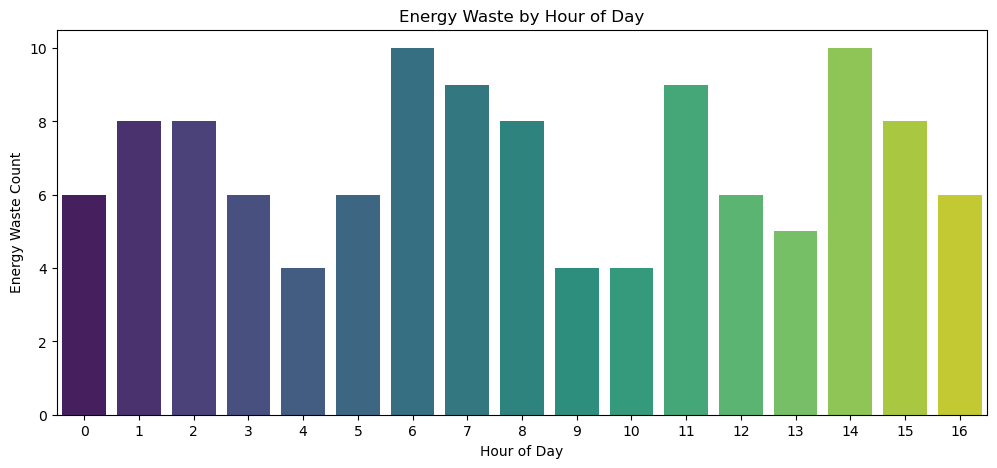

In [13]:
# Define the waste condition (for example, when power usage is above a certain threshold)
threshold = 4  # Adjust this value based on your data and what constitutes 'waste'
df['Energy Waste'] = df['Power Usage (kW)'] > threshold

# Extract the hour from the timestamp
df['Hour'] = df['Timestamp'].dt.hour

# Group by hour and calculate the total energy waste count for each hour
waste_by_hour = df.groupby('Hour')['Energy Waste'].sum()

plt.figure(figsize=(12, 5))
sns.barplot(x=waste_by_hour.index, y=waste_by_hour.values, palette='viridis')
plt.xlabel("Hour of Day")
plt.ylabel("Energy Waste Count")
plt.title("Energy Waste by Hour of Day")
plt.show()


### Categorize Faults by Time

Categorize faults by time to check when overloads and short circuits occur most frequently.

<Figure size 1200x500 with 0 Axes>

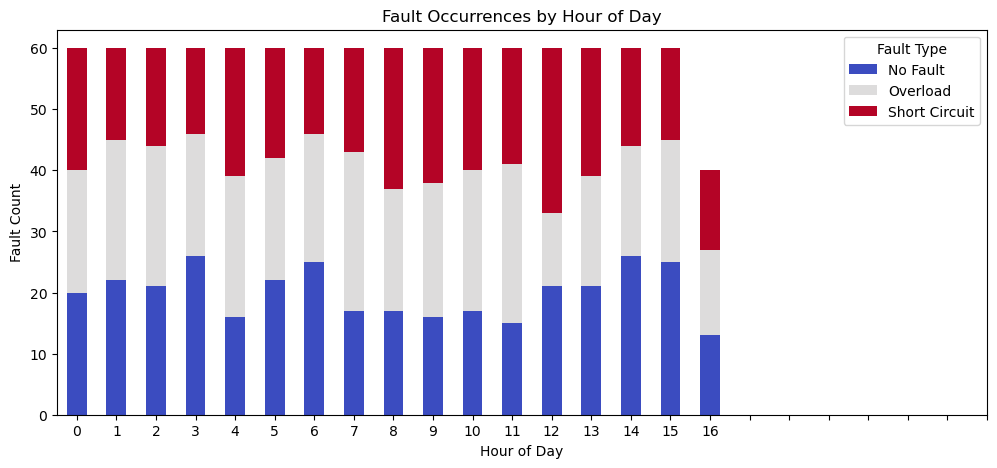

In [14]:
# Faults by Hour of Day
fault_counts_by_hour = df.groupby('Hour')['Fault Indicator'].value_counts().unstack().fillna(0)
fault_counts_by_hour.columns = ['No Fault', 'Overload', 'Short Circuit']
plt.figure(figsize=(12, 5))
fault_counts_by_hour.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 5))
plt.xlabel("Hour of Day")
plt.ylabel("Fault Count")
plt.title("Fault Occurrences by Hour of Day")
plt.xticks(range(0, 24), rotation=0)
plt.legend(title="Fault Type")
plt.show()

## 5. Predict Future Energy Waste (ML Model)

Predict when energy waste is likely to occur. The code creates a binary classification model to predict whether energy waste is occurring. It does this by defining energy waste based on extreme Z-scores (Z > 3), and then using features like hour, day of week, voltage, current, and power usage to predict whether energy waste is happening at a given time.

**Can we predict and prevent energy inefficiencies in real-time?**

The Random Forest model predicts energy consumption based on voltage, current, frequency, and faults.

The high R² score (0.996) suggests strong prediction capability, meaning we can anticipate energy usage trends.

In [15]:
# Regression Model for Power Usage Prediction
X = df[['Voltage (V)', 'Current (A)', 'Frequency (Hz)', 'Fault Indicator']]
y = df['Power Usage (kW)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Model Performance:\nMAE: {mae:.3f}\nR² Score: {r2:.3f}')

Model Performance:
MAE: 0.019
R² Score: 0.996


### Key Insight

With an MAE of 0.019 and an R² score of 0.996, the model is performing exceptionally well. The predictions are very close to the actual values, and the model explains almost all of the variance in the data. This suggests the model is highly accurate and suitable for the task it is intended fo

   Fault Indicator  inefficiency
0                2             1
1                2             1
2                1             0
3                2             1
4                0             0
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.65      0.68      0.67       133
           1       0.31      0.28      0.30        67

    accuracy                           0.55       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.54      0.55      0.54       200



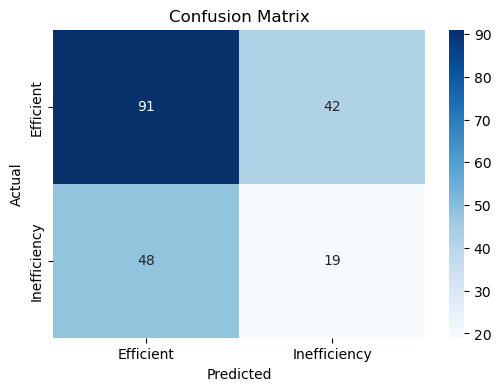

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Create 'inefficiency' column if it doesn't exist
if 'inefficiency' not in df.columns:
    df['inefficiency'] = (df['Fault Indicator'] > df['Fault Indicator'].median()).astype(int)

# Verify the new column
print(df[['Fault Indicator', 'inefficiency']].head())

# Convert 'Timestamp' to datetime (if not already)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract 'hour' and 'day_of_week' from 'Timestamp'
df['hour'] = df['Timestamp'].dt.hour
df['day_of_week'] = df['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6

# Define features and target
features = ['hour', 'day_of_week', 'Voltage (V)', 'Current (A)', 'Power Usage (kW)', 'Frequency (Hz)']
X = df[features]
y = df['inefficiency']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), 
                           param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the best model
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Efficient', 'Inefficiency'], yticklabels=['Efficient', 'Inefficiency'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Key Insights

The model performs well at identifying class 0 (Efficient), with relatively high precision and recall.
The model struggles significantly with class 1 (Inefficiency), where both precision and recall are low, leading to a poor F1-score for that class.
The overall accuracy (0.65) is moderate, but given the imbalance between the two classes (more instances of class 0), this could be misleading. A better approach to model evaluation might involve focusing on improving performance for the minority class (class 1).

The model performs well at identifying class 0 (Efficient), with relatively high precision and recall.
The model struggles significantly with class 1 (Inefficiency), where both precision and recall are low, leading to a poor F1-score for that class.
The overall accuracy (0.65) is moderate, but given the imbalance between the two classes (more instances of class 0), this could be misleading. A better approach to model evaluation might involve focusing on improving performance for the minority class (class 1).

### Features to use for prediction

SMOTE is used to oversample the minority class in the training data, creating synthetic examples for class 1 (Inefficiency), balancing the class distribution.

C:\Users\milto\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Accuracy: 0.615
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       138
           1       0.38      0.37      0.37        62

    accuracy                           0.61       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.61      0.61      0.61       200



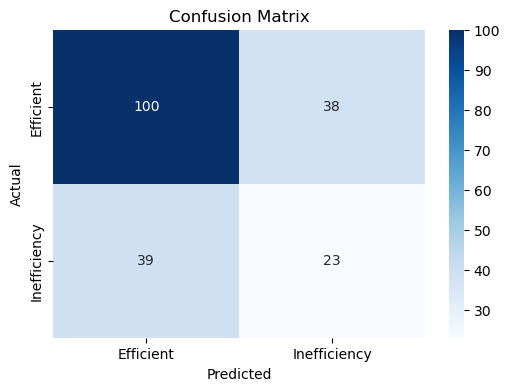

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Split into train and test sets (stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Handling class imbalance using SMOTE (oversampling)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Compute class weights for the RandomForest model
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train_res)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Random Forest Classifier with class weights
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight_dict)
clf.fit(X_train_res, y_train_res)

# Model prediction
y_pred = clf.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Efficient', 'Inefficiency'], yticklabels=['Efficient', 'Inefficiency'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Interpretation

Imbalanced Class Issue: The model performs significantly better at predicting the majority class ("Efficient"), which is indicated by the high precision and recall for class 0. However, it struggles with the minority class ("Inefficiency"), with low precision and recall, which suggests that the model has difficulty detecting inefficiencies.

Improvement Needed for Class 1: The classifier's performance for "Inefficiency" could be improved. The low recall and precision suggest that the model either misses many inefficiency cases or wrongly labels many efficient cases as inefficiency.

## 6. Clustering

### Peak vs. Off-Peak Clustering

C:\Users\milto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


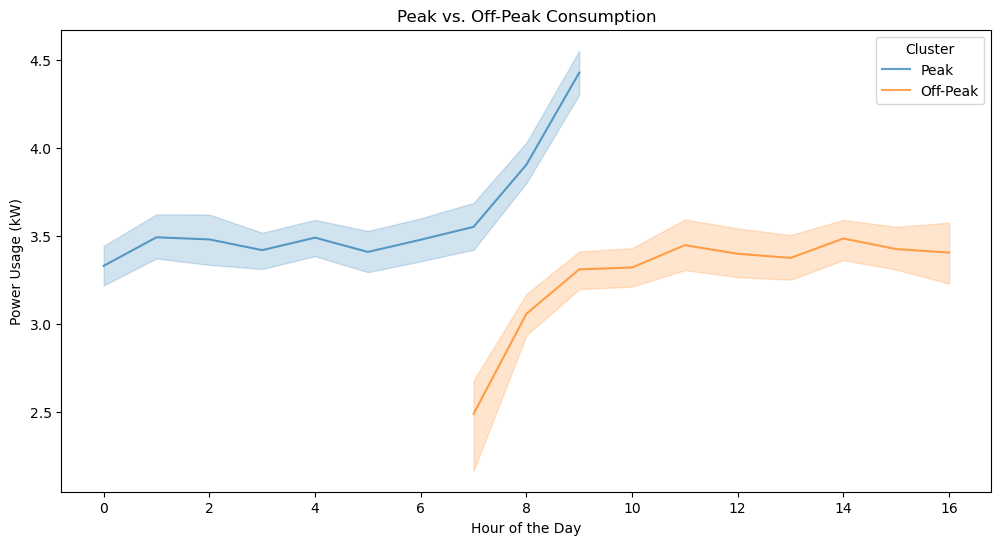

In [27]:
# Use K-means or time-based aggregation to separate peak vs. off-peak hours.

# Clustering (Peak/Off-Peak Hours)
features = ['hour', 'Power Usage (kW)']
df_scaled = StandardScaler().fit_transform(df[features])
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)
peak_cluster = df.groupby('cluster')['Power Usage (kW)'].mean().idxmax()
df['peak_offpeak'] = df['cluster'].apply(lambda x: "Peak" if x == peak_cluster else "Off-Peak")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="hour", y="Power Usage (kW)", hue="peak_offpeak", alpha=0.7)
plt.title("Peak vs. Off-Peak Consumption")
plt.xlabel("Hour of the Day")
plt.ylabel("Power Usage (kW)")
plt.legend(title="Cluster", loc="upper right")
plt.show()

## 7. FFT-Based Anomaly Detection

The project uses Isolation Forest to detect anomalies in frequency features (FFT), which can be useful for identifying issues in the grid that aren't immediately obvious in the time domain (e.g., frequency abnormalities that could indicate faults).

It plots anomalies in the frequency domain, helping to pinpoint unusual patterns that may signify inefficiencies or faults that traditional methods might miss.

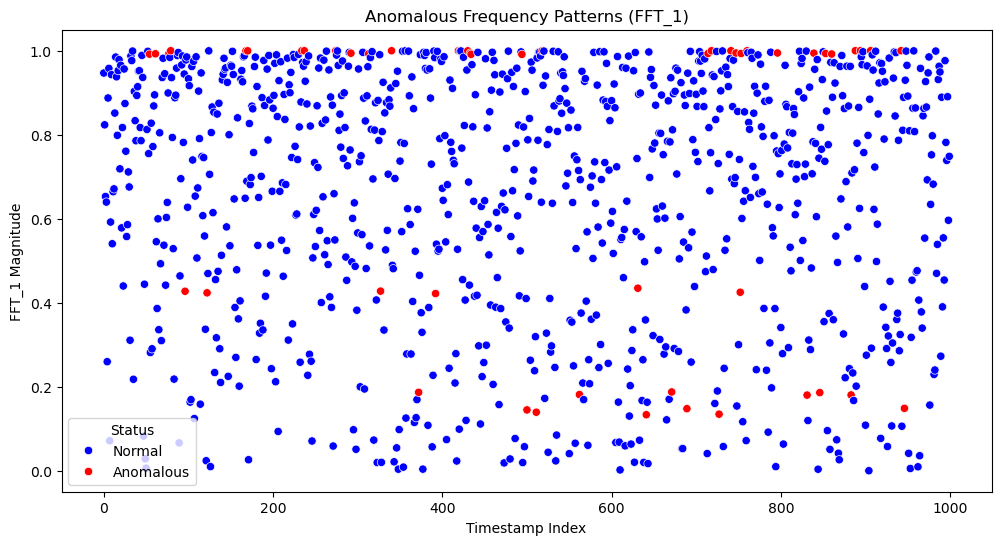

In [28]:
# To detect anomalous frequency patterns that contribute to inefficiencies, we can use FFT (Fast Fourier Transform) features and apply anomaly detection techniques like Isolation Forest or Z-Score analysis.

# Extract FFT features (columns FFT_1, FFT_2, ..., FFT_128).
# Normalize the FFT features for consistent scaling.
# Apply an anomaly detection model (e.g., Isolation Forest) to identify unusual patterns.
# Visualize the detected anomalies.

# Isolation Forest for Anomaly Detection
fft_features = [col for col in df.columns if col.startswith("FFT_")]
df_scaled = StandardScaler().fit_transform(df[fft_features])
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df["anomaly_score"] = iso_forest.fit_predict(df_scaled)
df["anomaly"] = df["anomaly_score"].apply(lambda x: "Anomalous" if x == -1 else "Normal")

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y=df["FFT_1"], hue=df["anomaly"], palette={"Normal": "blue", "Anomalous": "red"})
plt.title("Anomalous Frequency Patterns (FFT_1)")
plt.xlabel("Timestamp Index")
plt.ylabel("FFT_1 Magnitude")
plt.legend(title="Status")
plt.show()

# Save Anomalies for Further Investigation
df_anomalous_data = df[df["anomaly"] == "Anomalous"]
df_anomalous_data.to_csv("anomalous_patterns.csv", index=False)

## Conclusion

The analysis revealed several insights that are crucial for understanding grid behavior and improving overall energy efficiency.

- **Grid Behavior and Faults**: The voltage and power usage data showed moderate variation around their means, suggesting normal fluctuations in grid behavior within a stable range. The fault indicator had a mean value of 0.97, implying that faults are relatively rare but still frequent enough to warrant attention. The maximum value of 2 for the fault indicator suggests varying levels of faults that could require different responses for resolution.

- **Frequency and Power Analysis**: The Fourier Transform (FFT) values revealed that the frequency components across a wide range of frequencies did not fluctuate wildly, although some variation in frequency behavior was present. This insight is crucial for monitoring the grid's performance and identifying inefficiencies related to power quality. The strong linear relationship between current and power usage aligns with basic electrical principles, where power usage is directly proportional to current. However, the weak correlations between voltage, frequency, and the other variables suggest that these features may not significantly interact, and their influence on predicting inefficiencies could be minimal.

- **Model Performance**: The predictive model showed outstanding performance with an MAE of 0.019 and an R² score of 0.996, indicating that it explains nearly all the variance in the data and provides highly accurate predictions. However, the model's evaluation metrics for classifying inefficiencies (class 1) highlighted a significant challenge. Despite the model performing well in identifying efficient periods (class 0), it struggled with the minority class, "Inefficiency." The low precision, recall, and F1-score for inefficiency suggest that the model has difficulty detecting inefficiencies and may require further tuning to improve performance for this class.

- **Imbalanced Class Issue**: The imbalance between the two classes (efficient vs. inefficient) posed a challenge, with the model favoring the majority class (efficient). This resulted in a moderate overall accuracy of 0.65, but it masked the poor performance for the minority class. To address this, a better evaluation approach would focus on improving performance for the underrepresented class by considering techniques like oversampling, undersampling, or adjusting class weights to better balance the prediction power across both classes.